Before your start:
Read the README.md file
Comment as much as you can and use the resources (README.md file)
Happy learning!


Challenge 1 - Generate and Plot Normal Distributions
Step 1: Generate samples and test normal distribution
Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with scipy.stats.normaltest.

Hint: Read the documentation for scipy.stats.normaltest. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.

In [30]:
import random
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import poisson
import matplotlib.pyplot as plt
from math import *
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
sample_size=[10, 50, 500, 5000]

mu, sigma = 50, 5 # mean and standard deviation
data=pd.DataFrame()
for size in sample_size:
    sample = pd.Series(np.random.normal(mu, sigma, size))
    #print(sample)
    data = data.append(sample, ignore_index=True)
    distribution = stats.normaltest(sample)
    print(distribution)



NormaltestResult(statistic=1.465598232413707, pvalue=0.48056195695645665)
NormaltestResult(statistic=0.9157268396546011, pvalue=0.6326338755509887)
NormaltestResult(statistic=0.5291369613599338, pvalue=0.7675370856062873)
NormaltestResult(statistic=0.9553058177468594, pvalue=0.6202374385368992)


In [51]:
Data = data.T
Data.head(10)

,0,1,2,3
0,39.026957,53.466657,59.016755,49.208825
1,50.904619,51.506487,49.967460,50.779644
2,54.493123,45.150260,43.711084,38.620088
3,49.313908,56.440141,45.774876,40.957904
4,52.756646,49.816867,46.819877,43.230454
5,47.468419,51.174420,45.150614,58.324871
6,43.736384,41.782063,52.412748,45.152636
7,50.677765,55.373762,57.825208,53.777777
8,53.781960,63.526347,53.697150,50.410157
9,45.155129,58.576809,54.984776,61.708158


# Explain the test results here
Les questions échantillons ont des p-Value > 0.05 donc leur distribution suit une loi normale

Step 2: Plot normal distributions
Use matplotlib subplots to plot a histogram of each sample.

Hints:

Use subplots to compare your figures side by side.

Your output should look like below:

Text(0.5, 1.0, 'n=5000')

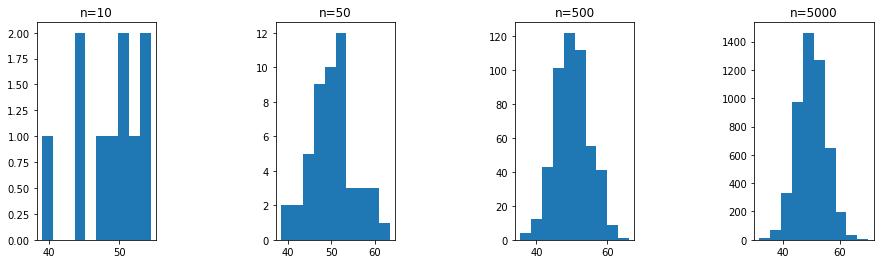

In [60]:
fig, axe = plt.subplots(1, 4)

fig.set_figwidth(15)
fig.subplots_adjust(wspace=1)

axe[0].hist(Data[0])
axe[0].set_title('n=10')

axe[1].hist(Data[1])
axe[1].set_title('n=50')

axe[2].hist(Data[2])
axe[2].set_title('n=500')

axe[3].hist(Data[3])
axe[3].set_title('n=5000')

Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

plus l'échantillon est grand plus sa distribution tend vers une loi normale

Challenge 2 - Plot Probability Mass Function (PMF)
Background knowledge
PMF shows the probability distribution of a discrete random variable. A discrete random variable has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.
Hint: use binom from scipy.stats.binom. Your output should look like below:

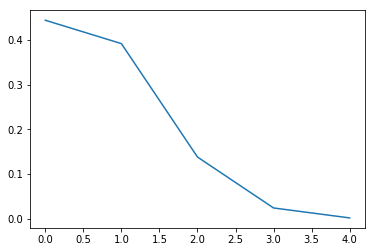

In [8]:
p=0.15
n=5

fig, ax = plt.subplots(1, 1)

x = range(n)
ax.plot(x, binom.pmf(x, n, p))



#### Explain what you observe from the plot above

# Your comment here

la PMF de la distribution binomiale décrois quand x augmente de 0 à n=5. 

Now plot PMP with 50, 500, and 5000 visitors

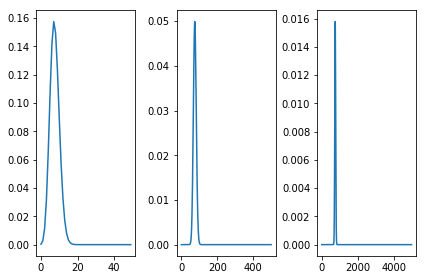

In [13]:
p=0.15
n1=50
n2=500
n3=5000

fig, ax = plt.subplots(1, 3)
fig.tight_layout()
x1 = range(n1)
ax[0].plot(x1, binom.pmf(x1, n1, p))

x2 = range(n2)
ax[1].plot(x2, binom.pmf(x2, n2, p))

x3 = range(n3)
ax[2].plot(x3, binom.pmf(x3, n3, p))

#### What did you notice from the distribution plots? Comment your findings.

Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.¶

A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

In [51]:
prob_320 = poisson.pmf(320, 300)
prob_320


0.011612348610402475

What is the probability of getting 60 visits?¶




In [50]:
prob_60= poisson.pmf(60, 300)
prob_60

2.622743762294515e-64

Plot the distribution of the probability for getting 0-1000 visits.
Hints:

Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

Your plot should look like below:



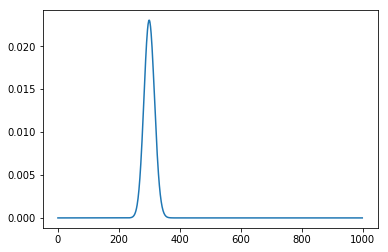

In [49]:
n=np.arange(1000)

param = 300
po = stats.poisson(param)
fig, ax = plt.subplots(1, 1)
ax.plot(n, poisson.pmf(n, param))
